In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Bengali Fish Recognizer/

/content/drive/MyDrive/Bengali Fish Recognizer


In [ ]:
!pip install grad-cam fastai gradio==3.50.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
import cv2
import torch
import numpy as np
import gradio as gr
from fastai.vision.all import *
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
model = load_learner("models/ResNet50_1.pkl")

In [ ]:
# Transforming to pytorch model
pytorch_model = model.eval()

In [ ]:
labels = ['Ayre', 'Catla', 'Chital', 'Ilish', 'Kachki', 'Kajoli', 'Koi', 'Magur', 'Mola Dhela', 'Mrigal', 'Pabda', 'Pangash', 'Poa', 'Puti', 'Rui', 'Shing', 'Silver Carp', 'Taki', 'Telapia', 'Tengra']

In [ ]:
def xai_visualization(image, image_tensor, targeted_category, model, target_layers):

  cam = GradCAM(model = model, target_layers = target_layers)

  targets = [ClassifierOutputTarget(targeted_category)]

  grayscale_cam = cam(input_tensor = image_tensor, targets = targets)

  mask = grayscale_cam[0, :]

  # image = cv2.imread(image_path)

  # image = cv2.resize(
  #     image,
  #     dsize=(224, 224),
  #     interpolation=cv2.INTER_CUBIC)

  # print(image.shape)

  plt.imshow(image)

  plt.imshow(mask*255, cmap="plasma", alpha=0.6)

  plt.show()


In [ ]:
def preprocess_image(image_path):
  # Reading image
  image = cv2.imread(image_path)

  # Resizing an image
  image = cv2.resize(
      image,
      dsize=(224, 224),
      interpolation=cv2.INTER_CUBIC)

  # Converting image to tensor
  img_tensor = transforms.ToTensor()(image)

  # Converting image to batch
  img_tensor = img_tensor.reshape(1,3,224,224)

  return image, img_tensor

In [ ]:
def target_layers_finding(model):
  # Available layers
  layers = list(model.named_modules())

  # For Resnet-50
  target_layers = [layers[len(layers)-20][1]]

  return target_layers

In [ ]:
def classify_image(image_path):

  # Model Prediction
  label, _, probs = model.predict(image_path)

  # Predicted Category
  targeted_category = np.argmax(probs)

  # Preprocessed image and image tensor
  image, img_tensor = preprocess_image(image_path)

  # Target layer
  target_layer = target_layers_finding(pytorch_model)

  xai_visualization(image, img_tensor, targeted_category, pytorch_model, target_layer)

  # print(f"Category with most probability: {np.argmax(probs)}")

  return image_path, dict(zip(labels, map(float, probs)))

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


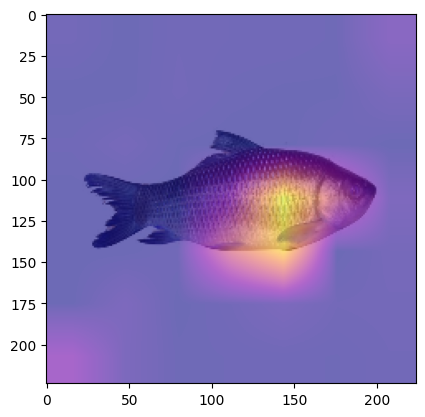

In [ ]:
classify_image('test images/unknown_01.jpg')

In [ ]:
inputs = gr.Image()

outputs = [
    gr.Image(),
    gr.Label(num_top_classes=5)
  ]


In [ ]:
examples = [
    'test images/unknown_01.jpg',
    'test images/unknown_02.png',
    'test images/unknown_03.jpg',
    'test images/unknown_04.jpg',
    'test images/unknown_05.jpg',
    'test images/unknown_06.jpg',
    'test images/unknown_07.jpg',
    'test images/unknown_08.jpg',
    'test images/unknown_09.jpg',
    'test images/unknown_10.jpg',
    'test images/unknown_11.jpg',
    'test images/unknown_12.png',
    'test images/unknown_13.jpg',
    'test images/unknown_14.png',
    'test images/unknown_15.png',
    'test images/unknown_16.png',
    'test images/unknown_17.jpg'
]

In [ ]:
interface = gr.Interface(
    fn = classify_image,
    inputs = inputs,
    outputs = outputs,
    examples = examples
  )

In [ ]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d6be5fb3249590eefc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def classify_image(image_path):

  label, _, probs = model.predict(image_path)

  # return dict(zip(labels, map(float, probs)))

  print(f"Category with most probability: {np.argmax(probs)}")
  return image_path, dict(zip(labels, map(float, probs)))

In [ ]:
ex_ai(model, 'test images/unknown_01.jpg')

In [ ]:
def recognize_image(image_path):
  label, _, probs = model.predict(image_path)
  image = imread(image_path)
  image = resize(image, [224,500])
  return [image, dict(zip(labels, map(float, probs)))]

In [ ]:
input_image = [
    gr.components.Image(type="filepath", label="Input Image")
]

output_image = [
    gr.components.Image(type="numpy", label="Output Image", height=224, width=500),
    gr.components.Label(label = "Output Label")

]

examples = [
    'test images/unknown_01.jpg',
    'test images/unknown_02.png',
    'test images/unknown_03.jpg',
    'test images/unknown_04.jpg',
    'test images/unknown_05.jpg',
    'test images/unknown_06.jpg',
    'test images/unknown_07.jpg',
    'test images/unknown_08.jpg',
    'test images/unknown_09.jpg',
    'test images/unknown_10.jpg',
    'test images/unknown_11.jpg',
    'test images/unknown_12.png',
    'test images/unknown_13.jpg',
    'test images/unknown_14.png',
    'test images/unknown_15.png',
    'test images/unknown_16.png',
    'test images/unknown_17.jpg',
]

interface = gr.Interface(fn=recognize_image, inputs = input_image, outputs = output_image, examples = examples)

interface.launch(share=True)

<ipython-input-39-ea2d86a368ad>:7: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'number_of_classes': 5}
  gr.components.Label(label = "Output Label", number_of_classes=5)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://62bf16bfaa4fe187b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
